Task 1: Examine and correct data types

In [ ]:
# imports, display options, load file and backup
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

INPUT_XLSX = r"Assignment 1 - Nexoid medical dataset .xlsx"
p = Path(INPUT_XLSX)
if not p.exists():
    raise FileNotFoundError(f"File not found: {INPUT_XLSX}. Put the file in the working dir or update the path.")

# Load dataframe and keep an in-memory backup
df = pd.read_excel(p)
df_orig = df.copy()

print("Loaded:", p.resolve())
print("Shape:", df.shape)

In [112]:
# basic info, dtypes and head
print("\n--- df.info() ---")
df.info(verbose=True, show_counts=True)

print("\n--- df.dtypes ---")
print(df.dtypes)

print("\n--- head(5) ---")
display(df.head())


--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5789 non-null   object 
 1   region                  1562 non-null   object 
 2   country                 5786 non-null   object 
 3   ip_latitude             5789 non-null   float64
 4   ip_longitude            5789 non-null   float64
 5   gender                  5789 non-null   object 
 6   age                     5789 non-null   object 
 7   height                  5789 non-null   int64  
 8   weight                  5789 non-null   int64  
 9   bmi                     5789 non-null   float64
 10  blood_type              5689 non-null   object 
 11  insurance               4497 non-null   object 
 12  income                  4636 non-null   object 
 13  smoking                 5753 non-null   object 
 14  alcohol              

,survey_date,region,country,ip_latitude,ip_longitude,gender,age,height,weight,bmi,blood_type,insurance,income,smoking,alcohol,cocaine,contacts_count,public_transport_count,working,worried,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,2020-09-06 00:00:00,AF,ZA,-33.9052,18.3821,male,20_30,188,104,29.4,op,yes,med,never,0.0,NaN,9.0,0.0,travel non critical,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0,0.079
1,17/06/2020,AF,ZA,-26.1891,28.0225,female,70_80,164,62,23.0,bp,yes,med,never,0.0,NaN,2.0,0.0,never,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0,1.168
2,20/06/2020,AF,ZA,-27.9752,27.1068,female,40_50,164,78,29.0,unknown,yes,med,never,2.0,NaN,5.0,0.0,stopped,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,100.0,0.284
3,20/06/2020,AF,ZA,-26.3227,28.1050,male,40_50,170,60,20.7,bp,yes,med,yesmedium,-1.0,NaN,6.0,0.0,travel critical,3.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,100.0,0.270
4,22/06/2020,AF,ZA,-29.8587,31.0653,female,30_40,164,64,23.7,op,yes,med,never,-1.0,NaN,2.0,0.0,travel critical,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,100.0,0.050


In [113]:
# null counts and percent
print("Null counts and percent (top 30 by null %):")
nulls = df.isnull().sum().rename('n_null')
null_pct = (nulls / len(df)).rename('pct_null')
display(pd.concat([nulls, null_pct], axis=1).sort_values('pct_null', ascending=False).head(30))

Null counts and percent (top 30 by null %):


,n_null,pct_null
cocaine,4359,0.752980
region,4227,0.730178
insurance,1292,0.223182
worried,1271,0.219554
public_transport_count,1217,0.210226
income,1153,0.199171
blood_type,100,0.017274
working,42,0.007255
contacts_count,42,0.007255
alcohol,38,0.006564


In [114]:
# unique counts for all columns (nunique)
print("\nUnique counts (nunique) for all columns (ascending):")
display(df.nunique(dropna=True).sort_values())


Unique counts (nunique) for all columns (ascending):


kidney_disease               2
liver_disease                2
compromised_immune           2
heart_disease                2
other_chronic                2
hiv_positive                 2
diabetes                     2
lung_disease                 2
covid19_positive             2
covid19_symptoms             2
covid19_contact              2
asthma                       2
health_worker                2
nursing_home                 2
gender                       3
insurance                    3
worried                      5
working                      5
income                       5
region                       5
smoking                      8
blood_type                   9
age                          9
alcohol                     16
public_transport_count      16
cocaine                     21
contacts_count              22
risk_infection              33
height                      49
weight                      68
country                     94
survey_date                120
bmi     

In [115]:
# sample values for object columns (help spot numeric-in-object)
obj_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
print("\nObject/string dtype columns and up to 8 sample unique values each:")
for c in obj_cols:
    vals = df[c].dropna().astype(str).unique()[:8]
    print(f" - {c}: sample -> {vals}")


Object/string dtype columns and up to 8 sample unique values each:
 - survey_date: sample -> ['2020-09-06 00:00:00' '17/06/2020' '20/06/2020' '22/06/2020' '27/06/2020'
 '2020-02-07 00:00:00' '2020-03-07 00:00:00' '2020-04-07 00:00:00']
 - region: sample -> ['AF' 'AS' 'EU' 'OC' 'SA']
 - country: sample -> ['ZA' 'EG' 'DZ' 'MU' 'AE' 'IN' 'BD' 'SA']
 - gender: sample -> ['male' 'female' 'other']
 - age: sample -> ['20_30' '70_80' '40_50' '30_40' '50_60' '60_70' '10_20' '0_10']
 - blood_type: sample -> ['op' 'bp' 'unknown' 'ap' 'on' 'abp' 'an' 'abn']
 - insurance: sample -> ['yes' 'no' 'blank']
 - income: sample -> ['med' 'low' 'high' 'gov' 'blank']
 - smoking: sample -> ['never' 'yesmedium' 'quit0' 'quit10' 'quit5' 'yesheavy' 'yeslight' 'vape']
 - working: sample -> ['travel non critical' 'never' 'stopped' 'travel critical' 'home']


In [116]:
# sample value_counts for ambiguous columns
ambiguous = ['alcohol', 'cocaine', 'covid19_symptoms', 'contacts_count', 'public_transport_count', 'worried']
for c in ambiguous:
    if c in df.columns:
        print(f"\nTop value_counts for {c}:")
        display(df[c].astype(str).value_counts(dropna=False).head(50))
    else:
        print(f"\n{c} not in dataframe")


Top value_counts for alcohol:


alcohol
-1.0    1920
0.0     1275
1.0      612
2.0      466
3.0      310
4.0      247
5.0      194
7.0      166
14.0     117
10.0     108
6.0       86
13.0      72
12.0      64
8.0       48
9.0       39
nan       38
11.0      27
Name: count, dtype: int64


Top value_counts for cocaine:


cocaine
nan     4359
-1.0    1078
0.0      228
1.0       33
2.0       17
5.0       14
3.0       12
4.0       12
7.0        7
9.0        5
28.0       4
20.0       3
10.0       3
27.0       3
23.0       2
6.0        2
16.0       2
21.0       1
22.0       1
14.0       1
15.0       1
25.0       1
Name: count, dtype: int64


Top value_counts for covid19_symptoms:


covid19_symptoms
0    4792
1     997
Name: count, dtype: int64


Top value_counts for contacts_count:


contacts_count
21.0    626
1.0     608
5.0     577
10.0    560
3.0     543
4.0     538
2.0     476
6.0     370
20.0    265
8.0     257
0.0     213
7.0     190
15.0    171
12.0     99
9.0      76
nan      42
19.0     34
14.0     34
11.0     33
16.0     29
13.0     26
18.0     14
17.0      8
Name: count, dtype: int64


Top value_counts for public_transport_count:


public_transport_count
0.0     4162
nan     1217
1.0      101
2.0       89
4.0       46
5.0       28
3.0       26
6.0       26
10.0      23
8.0       18
14.0      17
15.0      16
13.0       5
7.0        5
12.0       5
11.0       3
9.0        2
Name: count, dtype: int64


Top value_counts for worried:


worried
4.0    2079
3.0    1674
nan    1271
5.0     377
2.0     342
1.0      46
Name: count, dtype: int64

In [117]:
# data type convert

dtype_map = {
    "survey_date": "datetime64[ns]",
    "region": "object",
    "country": "object",
    "gender": "object",
    "age": "category",
    "blood_type": "object",
    "insurance": "object",
    "income": "object",
    "smoking": "object",
    "alcohol": "Int64",
    "cocaine": "Int64",
    "height": "Int64",
    "weight": "Int64",
    "contacts_count": "Int64",
    "public_transport_count": "Int64",
    "working": "object",
    "worried": "Int64",
    "covid19_positive": "Int64",
    "covid19_symptoms": "Int64",
    "covid19_contact": "Int64",
    "asthma": "Int64",
    "kidney_disease": "Int64",
    "liver_disease": "Int64",
    "compromised_immune": "Int64",
    "heart_disease": "Int64",
    "lung_disease": "Int64",
    "diabetes": "Int64",
    "hiv_positive": "Int64",
    "other_chronic": "Int64",
    "nursing_home": "Int64",
    "health_worker": "Int64",
    "risk_infection": "float64",
    "risk_mortality": "float64",
}

results = []
for col, target in dtype_map.items():
    if col not in df.columns:
        results.append((col, target, "missing"))
        continue
    try:
        if target == "datetime64[ns]":
            # try a non-destructive parse; errors='raise' will throw if any non-parseable values exist
            df[col] = pd.to_datetime(df[col], dayfirst=True, errors='raise')
        elif target == "int64":
            # try numpy int64; if fails because of NA or mixed types, try pandas nullable Int64
            try:
                df[col] = df[col].astype('int64')
                results.append((col, target, "converted (int64)"))
                continue
            except Exception:
                # try pandas nullable integer
                try:
                    df[col] = df[col].astype('Int64')
                    results.append((col, target, "converted (Int64 fallback)"))
                    continue
                except Exception as e2:
                    raise e2
        else:
            df[col] = df[col].astype(target)
        results.append((col, target, "converted"))
    except Exception as e:
        # skip conversion to avoid coercion; record reason
        results.append((col, target, f"skipped: {e}"))

# print summary
print("Conversion summary:")
for col, target, status in results:
    print(f"- {col:30} -> {target:10} : {status}")

print("\nResulting dtypes:")
print(df.dtypes)

Conversion summary:
- survey_date                    -> datetime64[ns] : converted
- region                         -> object     : converted
- country                        -> object     : converted
- gender                         -> object     : converted
- age                            -> category   : converted
- blood_type                     -> object     : converted
- insurance                      -> object     : converted
- income                         -> object     : converted
- smoking                        -> object     : converted
- alcohol                        -> Int64      : converted
- cocaine                        -> Int64      : converted
- height                         -> Int64      : converted
- weight                         -> Int64      : converted
- contacts_count                 -> Int64      : converted
- public_transport_count         -> Int64      : converted
- working                        -> object     : converted
- worried                       

Task 2: Prepare data

i.Identify and report the skewness present in the variables.


In [118]:
# select the columns of numeric data
import numpy as np
df2 = df.select_dtypes(include=[np.number]) 
df2.median()

ip_latitude               39.0163
ip_longitude              -81.031
height                      172.0
weight                       82.0
bmi                          26.8
alcohol                       0.0
cocaine                      -1.0
contacts_count                5.0
public_transport_count        0.0
worried                       4.0
covid19_positive              0.0
covid19_symptoms              0.0
covid19_contact               0.0
asthma                        0.0
kidney_disease                0.0
liver_disease                 0.0
compromised_immune            0.0
heart_disease                 0.0
lung_disease                  0.0
diabetes                      0.0
hiv_positive                  0.0
other_chronic                 0.0
nursing_home                  0.0
health_worker                 0.0
risk_infection               37.0
risk_mortality              0.156
dtype: Float64

In [119]:
df2.mean()

ip_latitude                33.054771
ip_longitude              -64.963734
height                    172.030057
weight                     84.773881
bmi                        28.570116
alcohol                     1.676926
cocaine                    -0.204895
contacts_count              7.828432
public_transport_count      0.415573
worried                     3.530987
covid19_positive            0.403351
covid19_symptoms            0.172223
covid19_contact             0.170841
asthma                      0.130765
kidney_disease              0.010883
liver_disease               0.007601
compromised_immune          0.059596
heart_disease               0.031439
lung_disease                 0.02332
diabetes                    0.081016
hiv_positive                0.003973
other_chronic               0.065296
nursing_home                0.003628
health_worker               0.084643
risk_infection             50.977198
risk_mortality              0.562321
dtype: Float64

In [120]:
df2.mode()[0:1]

,ip_latitude,ip_longitude,height,weight,bmi,alcohol,cocaine,contacts_count,public_transport_count,worried,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,37.8157,-77.0806,168,74,27.7,-1,-1,21,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100.0,0.05



2.missing values or errors in the data. List the variables with the identified problems.


In [121]:
missing = df.isnull().sum()
missing = missing[missing > 0] #only show columns with missing values
print("Missing values: ")
print(missing)

Missing values: 
region                    4227
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


3.Describe how you have identified these problems with evidence, 
e.g., plots, screenshots of your Python code, and outputs produced by your code.

4.Elaborate on the data preparation methods 
(e.g., data cleaning and transformation) to fix the identified data quality problems.

5.Demonstrate the data preparation by including screenshot(s) of your Python code 
and its outputs that show how you corrected the identified 6.data quality problems in this dataset.

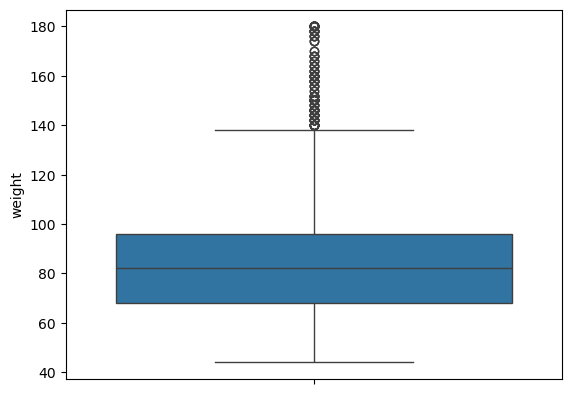

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(df['weight'])
plt.show()

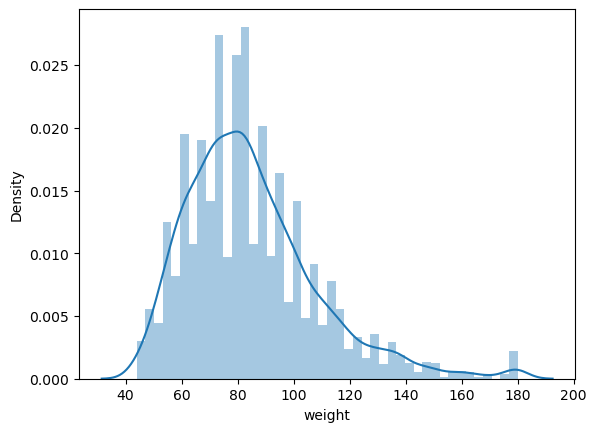

In [123]:
import warnings
warnings.filterwarnings("ignore")
dg = sns.distplot(df['weight'])
plt.show()

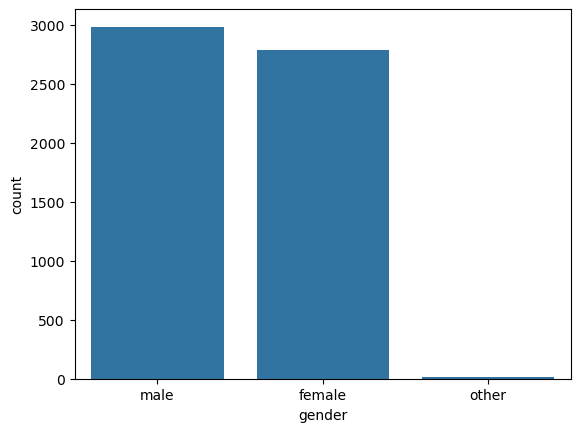

In [124]:
dg = sns.countplot(data=df, x='gender')
plt.show()

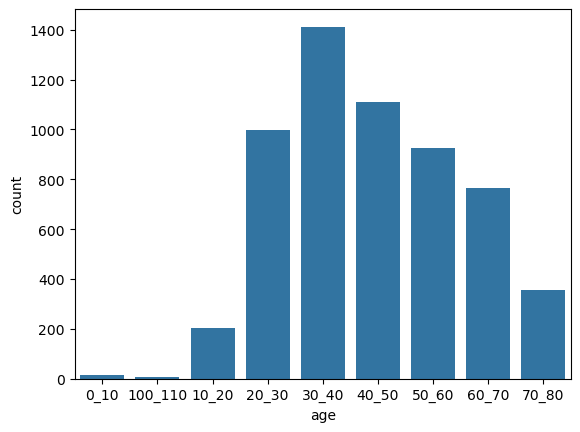

In [125]:
dg = sns.countplot(data=df, x='age')
plt.show()

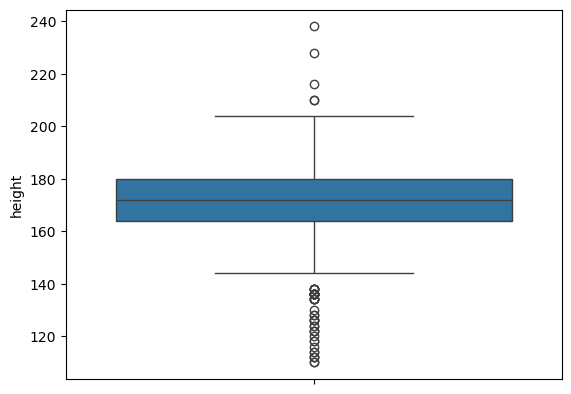

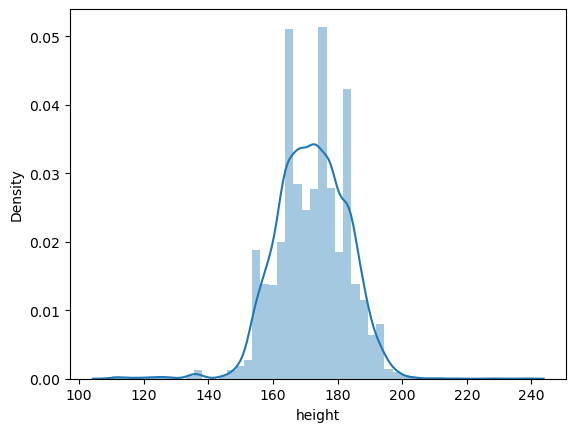

In [126]:
ax = sns.boxplot(df['height'])
plt.show()
import warnings
warnings.filterwarnings("ignore")
dg = sns.distplot(df['height'])
plt.show()

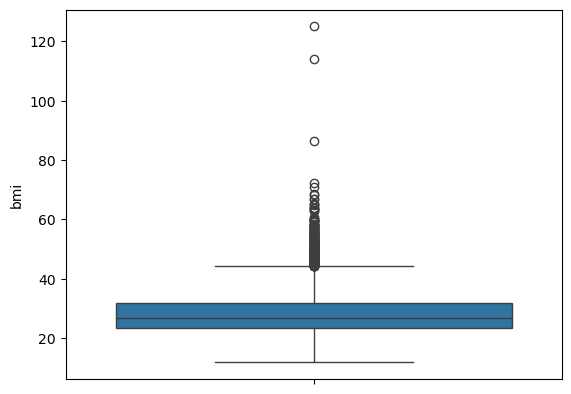

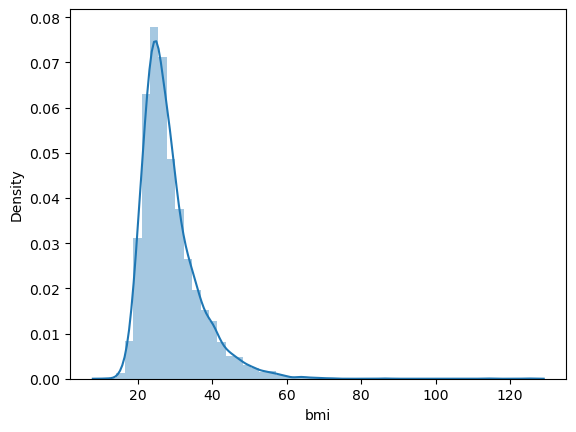

In [127]:
ax = sns.boxplot(df['bmi'])
plt.show()
import warnings
warnings.filterwarnings("ignore")
dg = sns.distplot(df['bmi'])
plt.show()

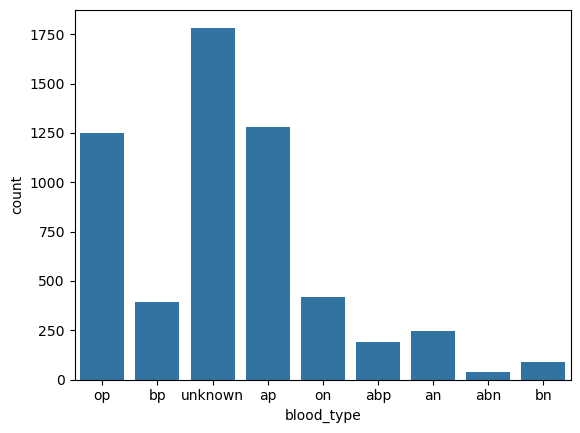

In [128]:
dg = sns.countplot(data=df, x='blood_type')
plt.show()

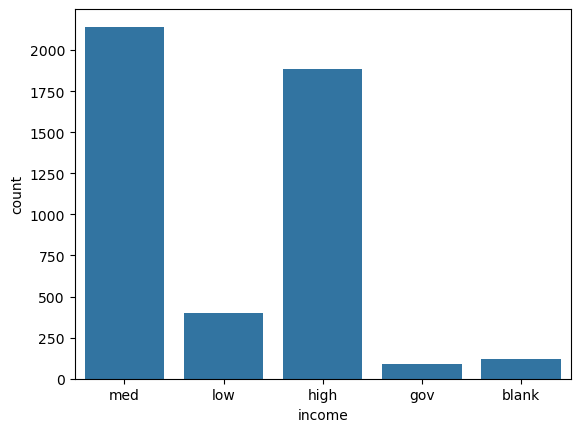

In [129]:
dg = sns.countplot(data=df, x='income')
plt.show()

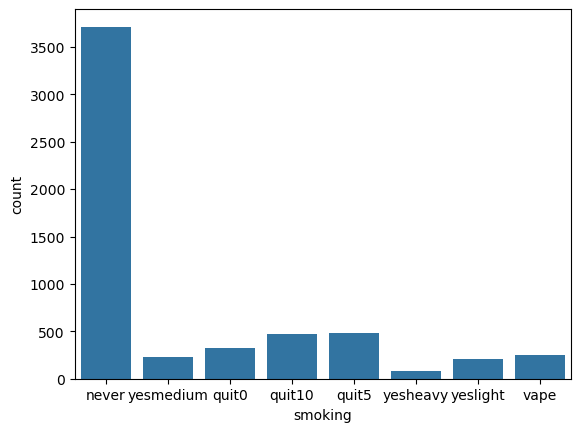

In [130]:
dg = sns.countplot(data=df, x='smoking')
plt.show()

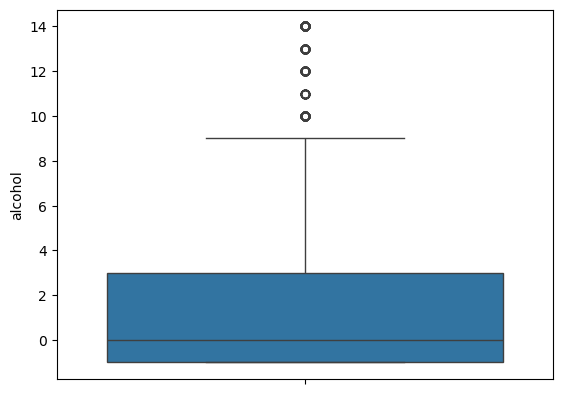

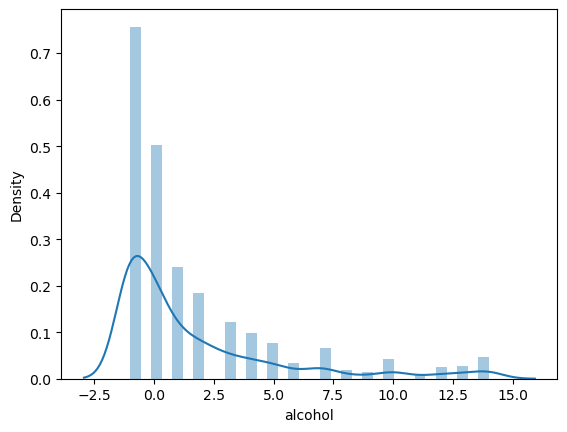

In [131]:
ax = sns.boxplot(df['alcohol'])
plt.show()
import warnings
warnings.filterwarnings("ignore")
dg = sns.distplot(df['alcohol'])
plt.show()

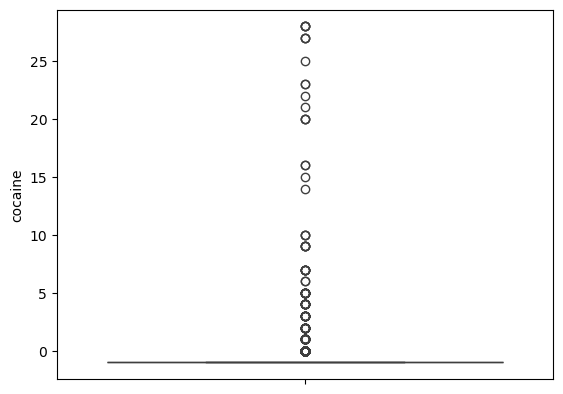

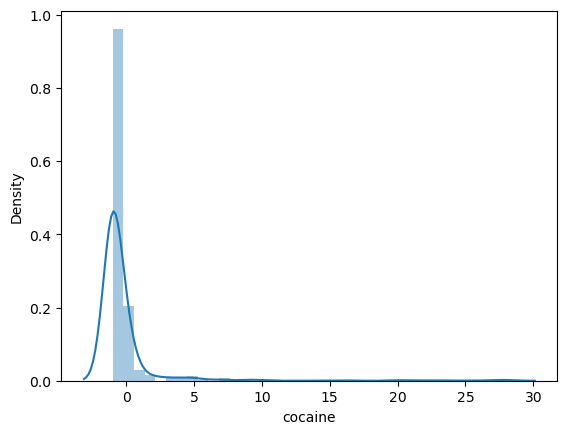

In [132]:
ax = sns.boxplot(df['cocaine'])
plt.show()
import warnings
warnings.filterwarnings("ignore")
dg = sns.distplot(df['cocaine'])
plt.show()

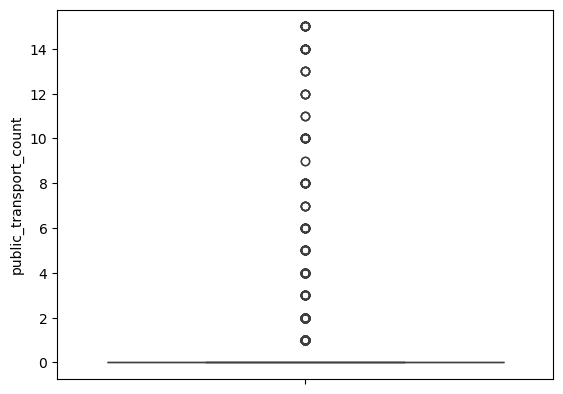

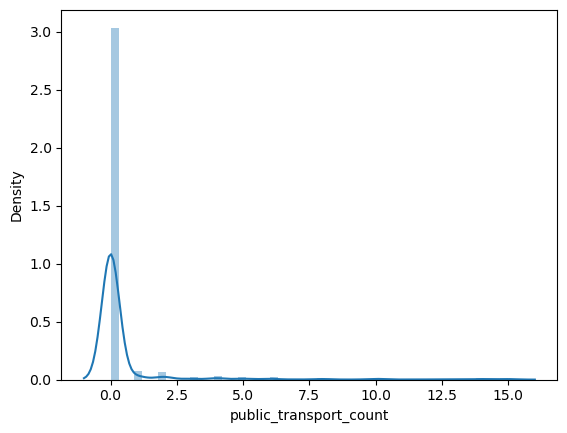

In [133]:
ax = sns.boxplot(df['public_transport_count'])
plt.show()
import warnings
warnings.filterwarnings("ignore")
dg = sns.distplot(df['public_transport_count'])
plt.show()

In [134]:
# Select only numeric columns
df2 = df.select_dtypes(include=[np.number])

# Calculate skewness for each numeric column
skewness = df2.skew()

# Filter only those that are significantly skewed (e.g. abs(skew) > 0.5)
skewed = skewness[abs(skewness) > 0.5]

print("Skewness of all numeric columns:")
print(skewness)

print("\nColumns with significant skewness (|skew| > 0.5):")
print(skewed)



Skewness of all numeric columns:
ip_latitude               -2.183174
ip_longitude               1.737147
height                    -0.392424
weight                      1.14023
bmi                        1.976549
alcohol                     1.84208
cocaine                     6.78995
contacts_count             0.928365
public_transport_count     5.682016
worried                    -0.36182
covid19_positive           0.394129
covid19_symptoms           1.736674
covid19_contact            1.749576
asthma                      2.19094
kidney_disease             9.431118
liver_disease             11.342068
compromised_immune         3.721594
heart_disease              5.371695
lung_disease               6.318706
diabetes                   3.071861
hiv_positive              15.774301
other_chronic              3.520099
nursing_home              16.517012
health_worker              2.985192
risk_infection             0.088152
risk_mortality             7.257846
dtype: Float64

Columns with si

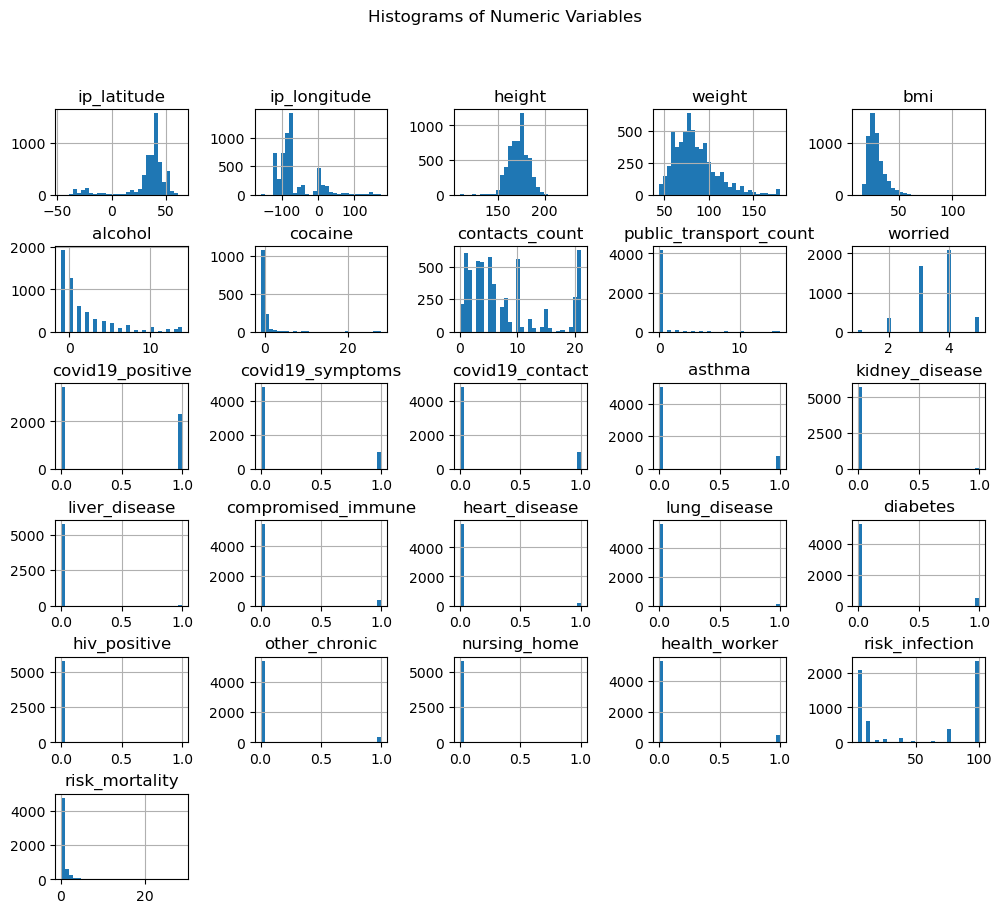

In [135]:
df2.hist(bins=30, figsize=(12, 10))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
plt.suptitle("Histograms of Numeric Variables")
plt.show()

Missing value replace to Zero


In [136]:
# For numerical variables fill with median
numerical_cols = ['height', 'weight', 'bmi', 'contacts_count', 'public_transport_count', 
                  'worried', 'risk_infection', 'risk_mortality', 'alcohol']
for col in numerical_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled {col} missing values with median: {df[col].median()}")

# For categorical variables fill with 'unknown'
categorical_cols = ['blood_type', 'insurance', 'income', 'smoking', 'working', 'region', 'country']
for col in categorical_cols:
    if col in df.columns:
        df[col].fillna('unknown', inplace=True)
        print(f"Filled {col} missing values with 'unknown'")

# For binary/flag variables fill with 0
binary_cols = ['cocaine']
for col in binary_cols:
    if col in df.columns:
        df[col].fillna(0, inplace=True)
        print(f"Filled {col} missing values with 0")

Filled height missing values with median: 172.0
Filled weight missing values with median: 82.0
Filled bmi missing values with median: 26.8
Filled contacts_count missing values with median: 5.0
Filled public_transport_count missing values with median: 0.0
Filled worried missing values with median: 4.0
Filled risk_infection missing values with median: 37.0
Filled risk_mortality missing values with median: 0.156
Filled alcohol missing values with median: 0.0
Filled blood_type missing values with 'unknown'
Filled insurance missing values with 'unknown'
Filled income missing values with 'unknown'
Filled smoking missing values with 'unknown'
Filled working missing values with 'unknown'
Filled region missing values with 'unknown'
Filled country missing values with 'unknown'
Filled cocaine missing values with 0


Data transfer 

In [137]:
age_map = {'0_10':5,'10_20':15,'20_30': 25,'30_40':45,'40_50':55,'50_60':65,'60_70':75,'70_80':85,'90_100':95,'100_110':105}
df['age'] = df['age'].map(age_map)
df['age'].value_counts()

age
45     1412
55     1111
25      996
65      926
75      765
85      354
15      205
5        14
105       6
Name: count, dtype: int64

In [138]:
insurance_map = {'':0,'no':0, 'yes': 1}
df['insurance'] = df['insurance'].map(insurance_map)
df['insurance'].value_counts()

insurance
1.0    3544
0.0     622
Name: count, dtype: int64

In [139]:
income_map = {'':0, 'gov':0, 'low': 1, 'med':2, 'high':3}
df['income'] = df['income'].map(income_map)
df['income'].value_counts()


income
2.0    2142
3.0    1886
1.0     398
0.0      88
Name: count, dtype: int64

In [140]:
smoking_map = {'quit10':-3,'quit5':-2,'quit0':-1, 'never':0, 'vape': 1, 'yeslight':2, 'yesmedium':3, 'yesheavy':4}
df['smoking'] = df['smoking'].map(smoking_map)
df['smoking'].value_counts()

smoking
 0.0    3713
-2.0     485
-3.0     473
-1.0     319
 1.0     247
 3.0     230
 2.0     206
 4.0      80
Name: count, dtype: int64

In [141]:
# one hot encoding all categorical variables
# all numerical variables are automatically excluded
# number of columns after the conversion should increase significantly
print("Before:", len(df.columns))

# one hot encoding
df = pd.get_dummies(df)
df_2 = df.copy() # created this copy to use different Target variable in the section 4.2

print("After:", len(df.columns))

Before: 36
After: 158


In [142]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Columns: 158 entries, survey_date to working_unknown
dtypes: Int64(21), bool(128), datetime64[ns](1), float64(8)
memory usage: 2.1 MB
None


In [143]:
def data_prep():
    # read the dataset
    INPUT_XLSX = r"Assignment 1 - Nexoid medical dataset .xlsx"
    p = Path(INPUT_XLSX)
    df = pd.read_excel(p)

    # change age range into +-5 integer variable
    age_map = {'0_10':5,'10_20':15,'20_30': 25,'30_40':45,'40_50':55,'50_60':65,'60_70':75,'70_80':85,'90_100':95,'100_110':105}
    df['age'] = df['age'].map(age_map)
    
    # change insurance into binary 1/0 variable
    insurance_map = {'':0,'no':0, 'yes': 1}
    df['insurance'] = df['insurance'].map(insurance_map)
    
    # change income into integer (1 ot 3 level) variable
    income_map = {'':0, 'gov':0, 'low': 1, 'med':2, 'high':3}
    df['income'] = df['income'].map(income_map)

    # change smoking into integer (-3 to 4 level) variable
    smoking_map = {'quit10':-3,'quit5':-2,'quit0':-1, 'never':0, 'vape': 1, 'yeslight':2, 'yesmedium':3, 'yesheavy':4}
    df['smoking'] = df['smoking'].map(smoking_map)
    
    # For numerical variables fill with median
    numerical_cols = ['height', 'weight', 'bmi', 'contacts_count', 'public_transport_count', 
                  'worried', 'risk_infection', 'risk_mortality', 'alcohol']
    for col in numerical_cols:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Filled {col} missing values with median: {df[col].median()}")

    # For categorical variables fill with 'unknown'
    categorical_cols = ['blood_type', 'insurance', 'income', 'smoking', 'working', 'region', 'country']
    for col in categorical_cols:
        if col in df.columns:
            df[col].fillna('unknown', inplace=True)
            print(f"Filled {col} missing values with 'unknown'")

    
    # drop ID and the unused target variable
    df.drop(['survey_date', 'cocaine'], axis=1, inplace=True) # instead of TargetD, TargetB should be dropped.
    
    df = pd.get_dummies(df)
    
    return df


Relationship between 'covid19_positive' and 'smoking'

In [144]:

# info about the variables
print("\nVariables:")
print(df[['covid19_positive', 'smoking']].head(10))

print("\ncovid19_positive:")
print(df['covid19_positive'].value_counts())

print("\nsmoking:")
print(df['smoking'].value_counts())

#Only show 'covid19_positive', 'smoking'
df_clean = df[['covid19_positive', 'smoking']].copy()
df_clean = df_clean.dropna()

# Group smoking into two status
def categorize_smoking(status):
    if status <= 0:
        return 'non_current_smoker'
    elif status >0:
        return 'current_smoker'
    else:
        return 'other'

df_clean['smoking_category'] = df_clean['smoking'].apply(categorize_smoking)

print("\nSmoking categories after grouping:")
print(df_clean['smoking_category'].value_counts())



Variables:
   covid19_positive  smoking
0                 1      0.0
1                 1      0.0
2                 1      0.0
3                 1      3.0
4                 1      0.0
5                 1      0.0
6                 1      0.0
7                 0     -1.0
8                 0      0.0
9                 0     -3.0

covid19_positive:
covid19_positive
0    3454
1    2335
Name: count, dtype: Int64

smoking:
smoking
 0.0    3713
-2.0     485
-3.0     473
-1.0     319
 1.0     247
 3.0     230
 2.0     206
 4.0      80
Name: count, dtype: int64

Smoking categories after grouping:
smoking_category
non_current_smoker    4990
current_smoker         763
Name: count, dtype: int64


Contingency Table:
smoking_category  current_smoker  non_current_smoker
covid19_positive                                    
0                            395                3059
1                            368                1931

Proportions:
smoking_category  current_smoker  non_current_smoker
covid19_positive                                    
0                        0.11436             0.88564
1                        0.16007             0.83993


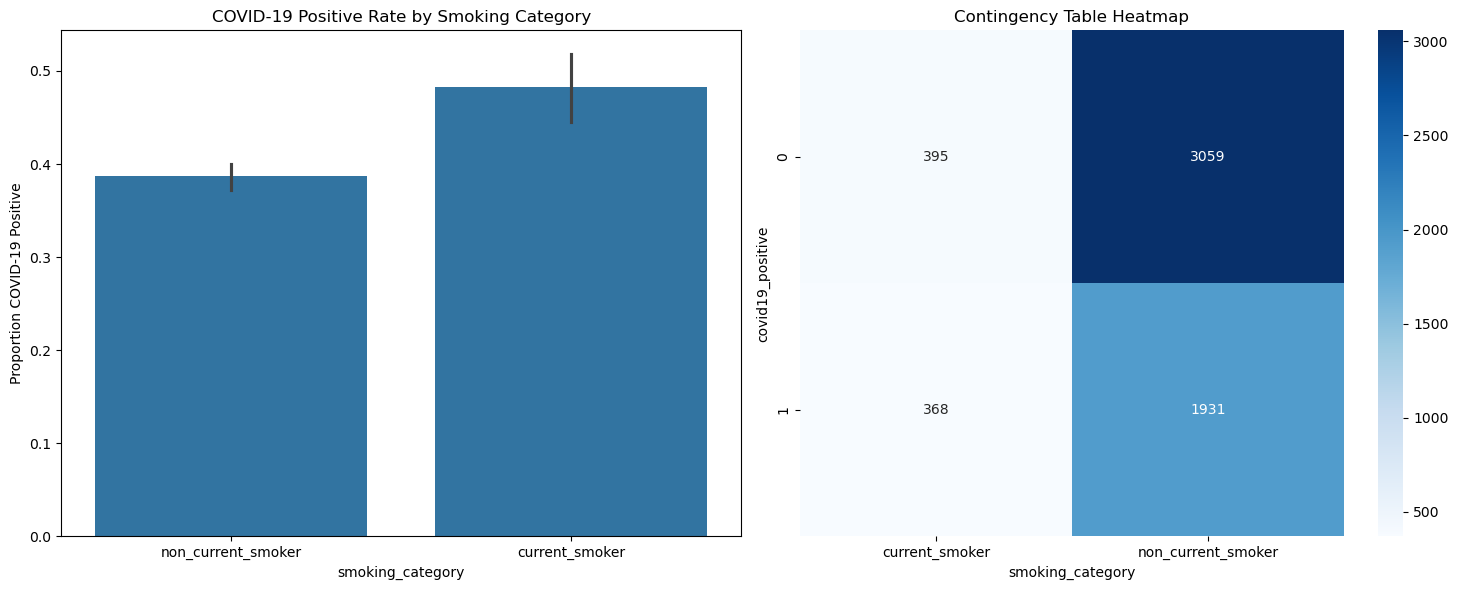


Odds Ratio (Current Smokers vs Non-Current Smokers): 1.4759


In [145]:

# Create contingency table
contingency_table = pd.crosstab(df_clean['covid19_positive'], df_clean['smoking_category'])
print("Contingency Table:")
print(contingency_table)


# Calculate proportions
proportion_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("\nProportions:")
print(proportion_table)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
sns.barplot(data=df_clean, x='smoking_category', y='covid19_positive', ax=axes[0])
axes[0].set_title('COVID-19 Positive Rate by Smoking Category')
axes[0].set_ylabel('Proportion COVID-19 Positive')

# Heatmap of contingency table
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Contingency Table Heatmap')

plt.tight_layout()
plt.show()

#Calculate odds ratios

a = contingency_table.loc[1, 'current_smoker']  # positive current smokers
b = contingency_table.loc[0, 'current_smoker']  # negative current smokers
c = contingency_table.loc[1, 'non_current_smoker']  # positive non-current smokers
d = contingency_table.loc[0, 'non_current_smoker']  # negative non-current smokers

odds_ratio = (a * d) / (b * c)

print(f"\nOdds Ratio (Current Smokers vs Non-Current Smokers): {odds_ratio:.4f}")


SUMMARY 

Odds Ratio: 1.4759
- Current smokers have higher odds of COVID-19 positivity

COVID-19 Positive Rates by Smoking Category:
- current_smoker: 16.01%
- non_current_smoker: 83.99%



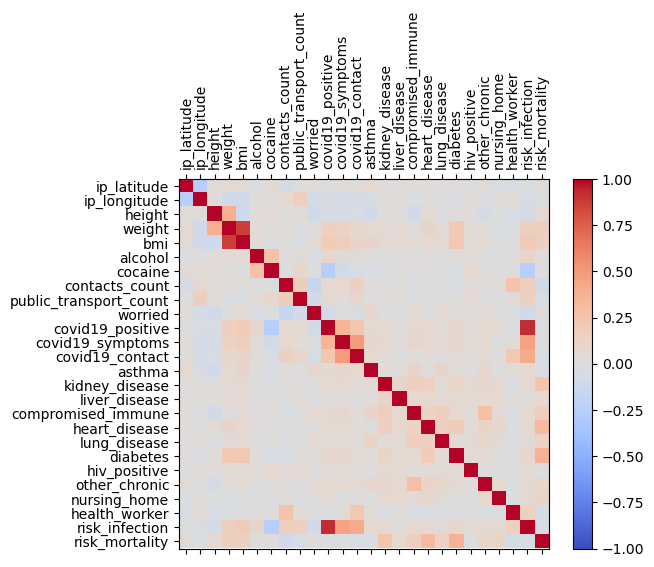

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()


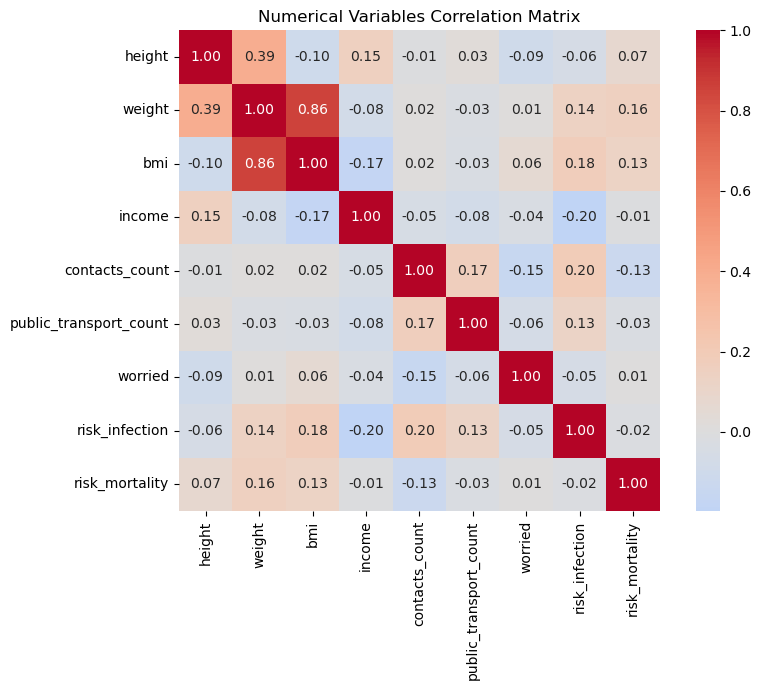

In [147]:
# read the dataset


numerical_vars = ['height', 'weight', 'bmi', 'income', 'contacts_count', 
                  'public_transport_count', 'worried', 'risk_infection', 'risk_mortality']

categorical_vars = ['gender', 'blood_type', 'insurance', 'smoking', 'alcohol', 
                   'cocaine', 'working', 'covid19_positive', 'covid19_symptoms', 
                   'covid19_contact', 'asthma', 'kidney_disease', 'liver_disease', 
                   'compromised_immune', 'heart_disease', 'lung_disease', 
                   'diabetes', 'hiv_positive', 'other_chronic', 'nursing_home', 
                   'health_worker']

# Calculate correlation matrix for numerical variables
df_analysis = df.copy()
numerical_df = df_analysis[numerical_vars].dropna()
correlation_matrix = numerical_df.corr(method='pearson')

# Plot correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f')
plt.title('Numerical Variables Correlation Matrix')
plt.tight_layout()
plt.show()

In [151]:
df.to_excel('cleaned_dataset.xlsx', index=False)
print("Cleaned data has saved")

Cleaned data has saved
